<a href="https://colab.research.google.com/github/minhkhoiine/Coloring-binary-image/blob/main/coloring_binary_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset (ảnh 32x32x3)
(x_train, _), (x_test, _) = cifar10.load_data()

# Normalize to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Convert to grayscale
x_train_gray = tf.image.rgb_to_grayscale(x_train).numpy()
x_test_gray = tf.image.rgb_to_grayscale(x_test).numpy()

print(f"x_train_gray shape: {x_train_gray.shape}, x_train color shape: {x_train.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 32s 0us/step
x_train_gray shape: (50000, 32, 32, 1), x_train color shape: (50000, 32, 32, 3)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, BatchNormalization, Activation

def build_colorization_model():
    input_img = Input(shape=(32, 32, 1))

    # Encoder
    x = Conv2D(64, (3, 3), padding='same')(input_img)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(128, (3, 3), padding='same', strides=2)(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Decoder
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(3, (3, 3), padding='same', activation='sigmoid')(x)  # Output RGB

    model = Model(inputs=input_img, outputs=x)
    model.compile(optimizer='adam', loss='mse')
    return model

model = build_colorization_model()
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 3)      │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,043 (590.01 KB)

 Trainable params: 150,531 (588.01 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
model.fit(
    x=x_train_gray,
    y=x_train,
    validation_data=(x_test_gray, x_test),
    batch_size=128,
    epochs=20
)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.0103 - val_loss: 0.0331
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0064 - val_loss: 0.0074
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0062 - val_loss: 0.0066
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0061 - val_loss: 0.0068
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0059 - val_loss: 0.0065
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0058 - val_loss: 0.0058
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0058 - val_loss: 0.0057
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0058 - val_loss: 0.0059
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/st

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step


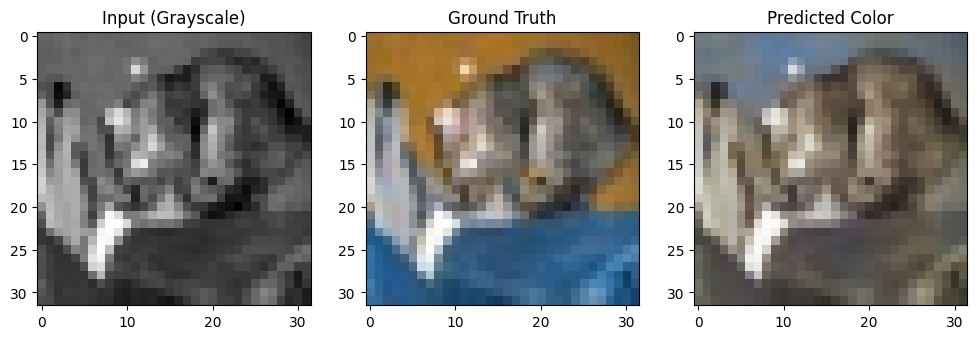

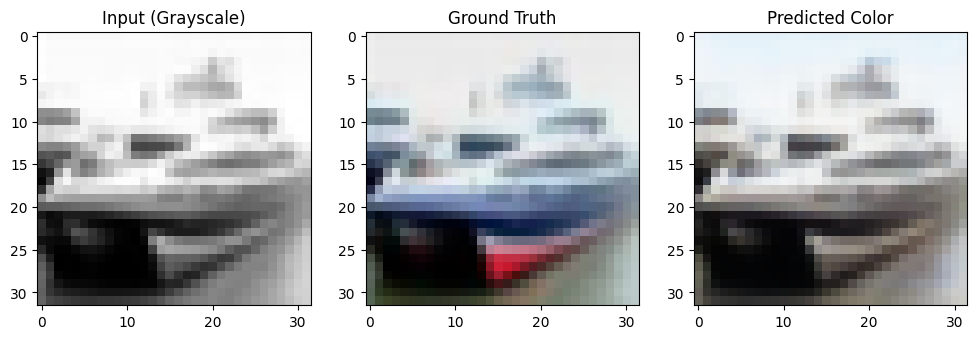

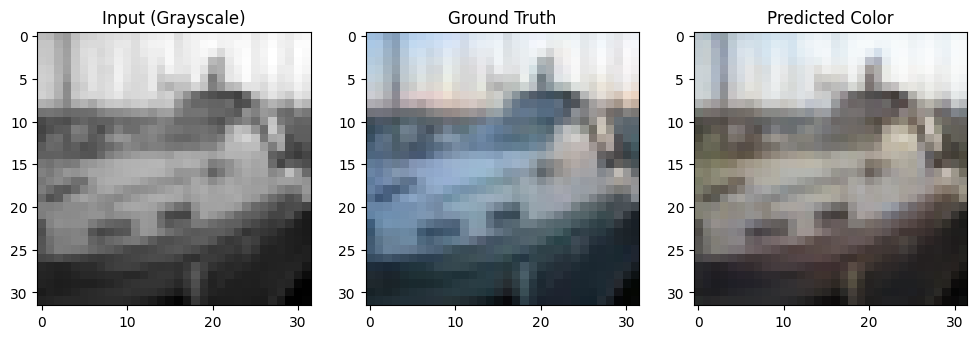

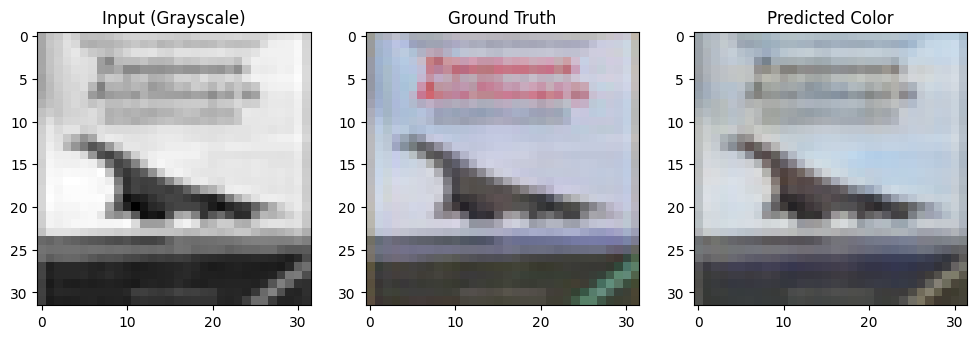

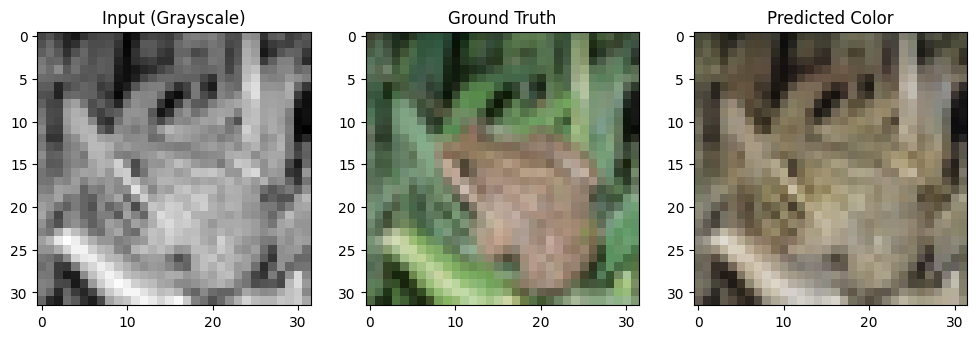

In [ ]:
# Predict
preds = model.predict(x_test_gray[:10])

# Hiển thị ảnh gốc, ảnh đen trắng và ảnh tô màu
for i in range(5):
    plt.figure(figsize=(12,4))

    # Grayscale input
    plt.subplot(1, 3, 1)
    plt.imshow(x_test_gray[i].squeeze(), cmap='gray')
    plt.title("Input (Grayscale)")

    # Ground truth
    plt.subplot(1, 3, 2)
    plt.imshow(x_test[i])
    plt.title("Ground Truth")

    # Output
    plt.subplot(1, 3, 3)
    plt.imshow(preds[i])
    plt.title("Predicted Color")
    plt.show()
